In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Hypothesis setting

In [2]:
filtered_citroen_audi_7_25k_df = pd.read_csv("filtered_citroen_audi_7_25k_df.csv").dropna()

## We will check if the km range can influence the price of a car

#### Null-hypothesis - Km range has no influence on car price


##### Check the distribution of prices

In [3]:
#round the values for every 1000€

def round_1000(sale_price):
    return 1000 * round(sale_price / 1000)

filtered_citroen_audi_7_25k_df["rounded_prices"] = filtered_citroen_audi_7_25k_df["sale_price"].apply(round_1000)


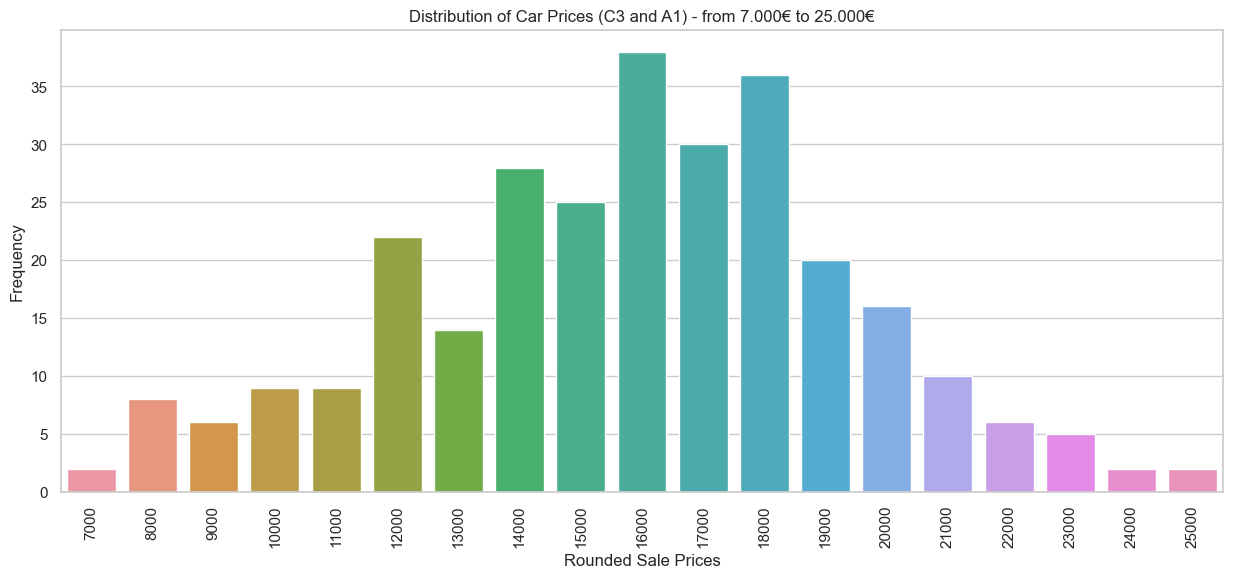

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_citroen_audi_7_25k_df, x="rounded_prices")
plt.xticks(rotation=90)
plt.xlabel("Rounded Sale Prices")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices (C3 and A1) - from 7.000€ to 25.000€")
plt.show()

#### Getting a sample of 30 cars with less then 90.000km and another with a range of 90.000km to 120.000km

In [5]:
car_sample_1 = filtered_citroen_audi_7_25k_df[(filtered_citroen_audi_7_25k_df["km_to_date"] > 0) & (filtered_citroen_audi_7_25k_df["km_to_date"] <= 90000)]["sale_price"].sample(30)
car_sample_2 = filtered_citroen_audi_7_25k_df[(filtered_citroen_audi_7_25k_df["km_to_date"] > 90000) & (filtered_citroen_audi_7_25k_df["km_to_date"] <= 200000)]["sale_price"].sample(30)

## Hypothesis Testing

In [6]:
import pandas as pd
from scipy import stats

def t_test_features(car_data1, car_data2, features=['sale_price']):
    results = {}

    for feature in features:
        t_stat, p_value = stats.ttest_ind(car_data1, car_data2, equal_var=False)
        results[feature] = p_value

    return results

results = t_test_features(car_sample_1, car_sample_2)
results


{'sale_price': 2.7764443971814794e-07}

#### If p-value is low, null must go!

In this case, the p-value is approx. 1.05e-05 (maybe be different with another run), which is very low. This indicates a strong evidence against the null-hypothesis.

This value can suggest that there is a significant difference in the average sale price between the two samples generated randomly.

## Conclusion:

### Car price is influenced by the km of the car, and there's a significant difference in the average prices of cars between the ranges of 0 - 90.000km and 90.000 - 120.000km